In [2]:
%load_ext autoreload
%autoreload 2
from notebooks.int_utils import retrieve_scratch, retrieve_transfer
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from comet_ml import API
from src import config
from notebooks.int_utils import get_compute_usage_df
sb.set_theme()
api = API(config.COMET_API_KEY)

<Axes: xlabel='model', ylabel='balanced_accuracy'>

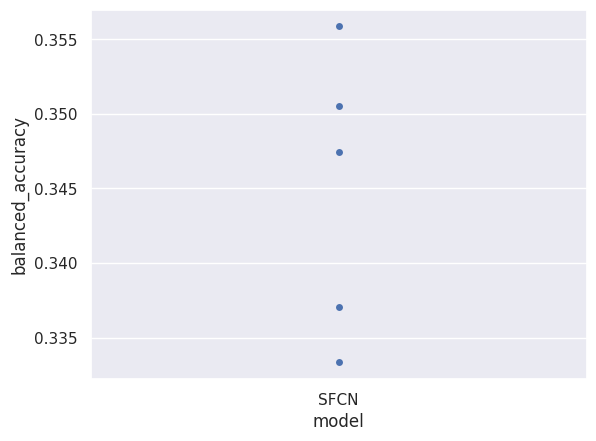

In [3]:
scratch = retrieve_scratch()
scratch = scratch[scratch["model"] == "SFCN"]
scratch = scratch.drop(columns="source")
scratch["Origin"] = "Scratch"
sb.swarmplot(scratch, x="model", y="balanced_accuracy")

<Axes: xlabel='model', ylabel='balanced_accuracy'>

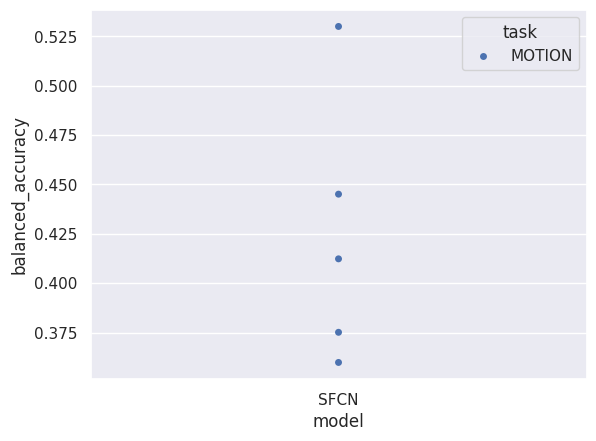

In [4]:
transfer = retrieve_transfer()
transfer = transfer[transfer["model"] == "SFCN"]
transfer = transfer[transfer["task"] == "MOTION"]
transfer["Origin"] = "Pretrained"
sb.swarmplot(transfer, x="model", y="balanced_accuracy", hue="task", dodge=True)

,model,task,run_num,balanced_accuracy,f1_0,f1_1,f1_2,Origin,Balanced Accuracy
20,SFCN,MOTION,5,0.412296,0.148148,0.247934,0.706667,Pretrained,0.412296
21,SFCN,MOTION,4,0.359852,0.000000,0.338235,0.686667,Pretrained,0.359852
22,SFCN,MOTION,3,0.445037,0.133333,0.425000,0.641975,Pretrained,0.445037
23,SFCN,MOTION,2,0.529926,0.184615,0.314050,0.679389,Pretrained,0.529926
24,SFCN,MOTION,1,0.375111,0.111111,0.446602,0.475728,Pretrained,0.375111
0,SFCN,NaN,5,0.333333,0.000000,0.000000,0.716332,Scratch,0.333333
0,SFCN,NaN,4,0.355852,0.000000,0.243478,0.703704,Scratch,0.355852
0,SFCN,NaN,3,0.350519,0.000000,0.239316,0.695652,Scratch,0.350519
0,SFCN,NaN,1,0.347407,0.000000,0.198198,0.701220,Scratch,0.347407
0,SFCN,NaN,2,0.337037,0.000000,0.021978,0.718391,Scratch,0.337037


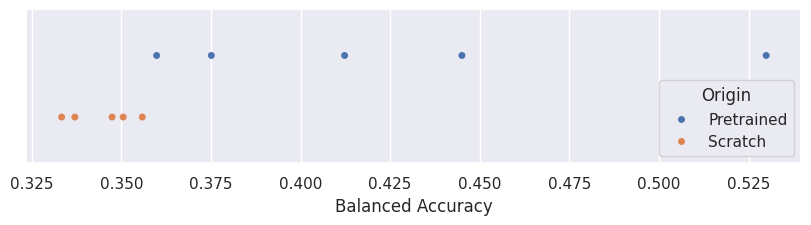

In [8]:
full = pd.concat([transfer, scratch])
full['Balanced Accuracy'] = full["balanced_accuracy"]
plt.figure(figsize=(10, 2))
sb.swarmplot(full, y="model", x="Balanced Accuracy", hue="Origin", dodge=True)
#get current axes
ax = plt.gca()

#hide x-axis
ax.get_yaxis().set_visible(False)
full

In [7]:
median = full.drop(columns="task").groupby(["model", "Origin"]).median().drop(columns="run_num")
print(median.to_latex(float_format="%.2f"))

\begin{tabular}{llrrrrr}
\toprule
 &  & balanced_accuracy & f1_0 & f1_1 & f1_2 & Balanced Accuracy \\
model & Origin &  &  &  &  &  \\
\midrule
\multirow[t]{2}{*}{SFCN} & Pretrained & 0.41 & 0.13 & 0.34 & 0.68 & 0.41 \\
 & Scratch & 0.35 & 0.00 & 0.20 & 0.70 & 0.35 \\
\cline{1-7}
\bottomrule
\end{tabular}



In [29]:
exps = api.get_experiments("mrart", "estimate-motion-pretrain", "pretraining-*")
pretrain_ressource_df = get_compute_usage_df(exps, task_dependent=True, pretrain=True)
exps = api.get_experiments("mrart", "transfer-ampscz-good")
transfer_ressource_df = get_compute_usage_df(exps, task_dependent=True)
exps = api.get_experiments("mrart", "baseline-ampscz")
scratch_ressource_df = get_compute_usage_df(exps)
scratch_ressource_df["task"] = "Scratch"
grouped = pd.concat([scratch_ressource_df, transfer_ressource_df])
pretrain_ressource_df

,model,task,millis,hours,minutes,seconds,duration,max_gpu_ram_used,max_gpu_power_usage
0,CONV5_FC3,MOTION,47678512,13,14,38,13:14:38,15.936127,297.299
1,CONV5_FC3,SSIM,76127133,21,8,47,21:08:47,15.936127,294.527
2,RES,MOTION,55748268,15,29,8,15:29:08,21.260796,348.059
3,RES,SSIM,63451184,17,37,31,17:37:31,21.260796,354.733
4,SERES,MOTION,77255583,21,27,35,21:27:35,25.763381,354.479
5,VIT,MOTION,54331219,15,5,31,15:05:31,41.724805,433.339
6,SERES,SSIM,61783834,17,9,43,17:09:43,25.763381,349.292
7,VIT,SSIM,43639234,12,7,19,12:07:19,41.760457,416.179
8,SFCN,MOTION,91736159,25,28,56,25:28:56,39.535378,403.939
9,SFCN,SSIM,103100796,28,38,20,28:38:20,39.531184,432.299


In [30]:
transfer_ressource_df = transfer_ressource_df[transfer_ressource_df["model"]=="SFCN"]
transfer_ressource_df = transfer_ressource_df[transfer_ressource_df["task"]=="MOTION"]

pretrain_ressource_df = pretrain_ressource_df[pretrain_ressource_df["model"]=="SFCN"]
pretrain_ressource_df = pretrain_ressource_df[pretrain_ressource_df["task"]=="MOTION"]
scratch_ressource_df = scratch_ressource_df[scratch_ressource_df["model"]=="SFCN"]
grouped = pd.concat([scratch_ressource_df, transfer_ressource_df])
pretrain_ressource_df

,model,task,millis,hours,minutes,seconds,duration,max_gpu_ram_used,max_gpu_power_usage
8,SFCN,MOTION,91736159,25,28,56,25:28:56,39.535378,403.939


<Axes: xlabel='model', ylabel='millis'>

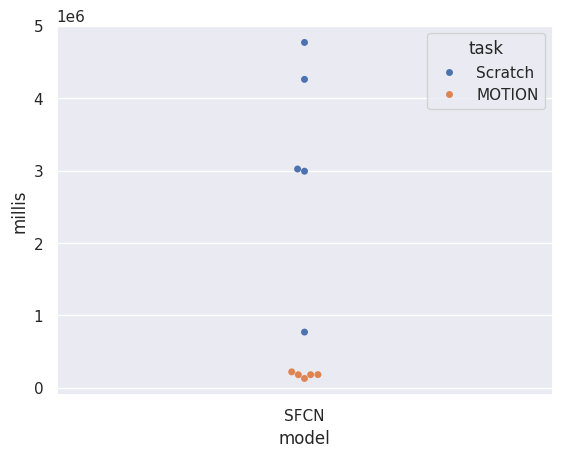

In [24]:
sb.swarmplot(grouped, x="model", y="millis", hue="task")

In [31]:
def row_to_timestr(row: pd.Series):
    return f'{int(row["hours"])}:{str(int(row["minutes"])).zfill(2)}:{str(int(row["seconds"])).zfill(2)}'


grouped_pretrain = pretrain_ressource_df.drop(
    columns=["duration", "task", "model"]
).median()
grouped_pretrain["duration"] = row_to_timestr(grouped_pretrain)
grouped_pretrain["task"] = "Pretrain"

grouped_trans = transfer_ressource_df.drop(
    columns=["duration", "task", "model"]
).median()
# grouped_trans["duration"] = grouped_trans.apply(row_to_timestr, axis=1)
grouped_trans["duration"] = row_to_timestr(grouped_trans)
grouped_trans["task"] = "Transfer"

grouped_scratch = scratch_ressource_df.drop(
    columns=["duration", "task", "model"]
).median()

# grouped_scratch["duration"] = grouped_scratch.apply(row_to_timestr, axis=1)
grouped_scratch["duration"] = row_to_timestr(grouped_scratch)
grouped_scratch["task"] = "Scratch"

scratch_data_only = grouped_scratch.drop(["hours", "task", "duration"])
trans_data_only = grouped_trans.drop(["hours", "task", "duration"])

improvement = (
    (scratch_data_only - trans_data_only).div(scratch_data_only, fill_value=0).mul(100)
)
improvement["duration"] = improvement["millis"]
improvement["task"] = "Decreased by (%)"
all_ressource = pd.DataFrame(
    [grouped_pretrain, grouped_trans, grouped_scratch, improvement]
)
droped = all_ressource.drop(columns=["millis", "hours", "minutes", "seconds"])
droped = droped.set_index("task", drop=True)
print(droped.to_latex(float_format="%.2f"))

\begin{tabular}{lrrl}
\toprule
 & max_gpu_ram_used & max_gpu_power_usage & duration \\
task &  &  &  \\
\midrule
Pretrain & 39.54 & 403.94 & 25:28:56 \\
Transfer & 2.50 & 76.79 & 0:03:02 \\
Scratch & 37.41 & 373.29 & 0:19:29 \\
Decreased by (%) & 93.32 & 79.43 & 94.00 \\
\bottomrule
\end{tabular}



In [32]:
nb_scratch_in_pretrain = (
    all_ressource["millis"].iloc[0] / all_ressource["millis"].iloc[2]
)
nb_transfer_in_scratch = (
    all_ressource["millis"].iloc[2] / all_ressource["millis"].iloc[1]
)
exp_to_rent = (all_ressource["millis"].iloc[0]) / (
    all_ressource["millis"].iloc[2] - all_ressource["millis"].iloc[1]
)
exp_to_rent

32.29575582062607